# Hackathon #1 - Binary Classification - Template
Always check the [Reference Document](https://docs.google.com/document/d/1A-1-UK9ol4tegfU4YQySEiBXBeqbx_tu1qdmiMAzNCM/edit?usp=sharing) for all information ;) 

Remember to keep your workflow consistent!

## Regarding the Data
- The dataset can be loaded with `load_data()` (check the already provided code below). It will output two dataframes:
  - `train`: labeled dataset (with target) 
  - `test`: unlabeled dataset (target is not available)
- You will use the `train` data to do your magic! When you are finished and have a predictive model you will have to make predictions using the `test` data and submit it to our platform (where you will get a AUC value - kind of what happens in Kaggle competitions). Check the file `submission_example.csv` for an example and the [Reference Document](https://docs.google.com/document/d/1A-1-UK9ol4tegfU4YQySEiBXBeqbx_tu1qdmiMAzNCM/edit?usp=sharing) for further information.
- You can and should perform train-test splits on the `train` data that you have available. Cross-validation is highly recommended. 
- The target name is `TomorrowRainForecast`: it is either 1 (rains tomorrow) and 0 (does not rain tomorrow).
- The `ID` is the identification variable which is very important for keeping track of the predictions you will make on the `test` data.

*Good luck,  
LDSA team*

In [1]:
# some useful imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data(data_dir='./data/'):
    train = pd.read_csv(data_dir+'train.csv')
    test = pd.read_csv(data_dir+'test.csv')
    return train, test

# -1. Load Data
Load the `train` and `test` datasets

In [3]:
train, test = load_data()

In [4]:
train.head()

,ID,AmountRain,StrongWindDir,StrongWindSpeed,MorningWindDir,AfternoonWindDir,AfternoonWindSpeed,MorningHumidity,AfternoonHumidity,MorningTemp,AfternoonTemp,DidRainToday,DaysSinceNewYear,TomorrowRainForecast
0,5683,0.0,WSW,43.0,N,SW,17.0,82.0,51.0,15.4,20.8,No,268,0
1,2971,0.0,E,15.0,NaN,SE,7.0,91.0,63.0,9.7,16.6,No,136,0
2,3560,0.0,S,33.0,WSW,WSW,17.0,58.0,38.0,10.9,15.9,No,217,0
3,2304,10.0,NE,30.0,S,SSE,11.0,96.0,93.0,4.7,6.4,Yes,195,1
4,3573,0.0,WSW,48.0,NaN,SW,26.0,59.0,40.0,11.5,15.9,No,232,0


# 0.Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

# Split the training dataset into X and Y.
X = train.drop(['TomorrowRainForecast', 'ID'], axis=1)
y = train['TomorrowRainForecast']



submission_id = test.pop('ID')


# Split the Cross Validation set from the train. The overall distribution within datasets:
# 60% Train, 20% Cross Validation, 20% Test
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2*len(X)/len(X_train))

In [6]:
print('Datasets number of rows:\n  X_train: %.0f\n  X_cv: %.0f\n' % (len(X_train), len(X_cv)))

Datasets number of rows:
  X_train: 5562
  X_cv: 1391



# 1. Fill NAs and Get Dummies

In [7]:
# Get the list of categorical and numerical columns.
categoricals = X.select_dtypes(include=['object'])
categoricals = list(categoricals.columns)

numericals = X.select_dtypes(exclude=['object'])
numericals = list(numericals.columns)


datasets = [X_train, X_cv, test]

for d in datasets:
   for c in categoricals:
       d.loc[:,c] = d.loc[:,c].fillna('unknown')
       
   for n in numericals:
       train_median = X_train[n].median()
       d.loc[:,n] = d.loc[:,n].fillna(train_median)

C:\Users\ffonseca009\AppData\Local\Continuum\anaconda3\envs\ldsa\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# 2. Data Analysis

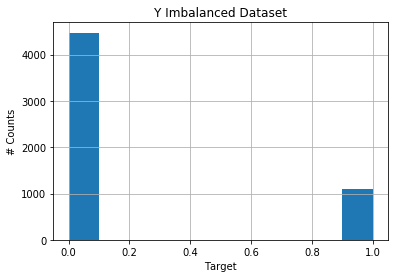

In [8]:
def plot_y_imbalance(y_vector):
    y_vector.hist()
    plt.title('Y Imbalanced Dataset')
    plt.xlabel('Target')
    plt.ylabel('# Counts')
    
plot_y_imbalance(y_train)

In [9]:
# The correlation matrix
X_train.corr()

,AmountRain,StrongWindSpeed,AfternoonWindSpeed,MorningHumidity,AfternoonHumidity,MorningTemp,AfternoonTemp,DaysSinceNewYear
AmountRain,1.000000,0.113778,0.065237,0.222811,0.295547,0.005153,-0.114881,-0.026020
StrongWindSpeed,0.113778,1.000000,0.677370,-0.346548,-0.182381,0.329719,0.200601,0.079064
AfternoonWindSpeed,0.065237,0.677370,1.000000,-0.226157,-0.148015,0.158723,0.057512,0.100308
MorningHumidity,0.222811,-0.346548,-0.226157,1.000000,0.692102,-0.538380,-0.503808,-0.055812
AfternoonHumidity,0.295547,-0.182381,-0.148015,0.692102,1.000000,-0.366913,-0.636172,-0.010735
MorningTemp,0.005153,0.329719,0.158723,-0.538380,-0.366913,1.000000,0.864300,-0.184870
AfternoonTemp,-0.114881,0.200601,0.057512,-0.503808,-0.636172,0.864300,1.000000,-0.204403
DaysSinceNewYear,-0.026020,0.079064,0.100308,-0.055812,-0.010735,-0.184870,-0.204403,1.000000


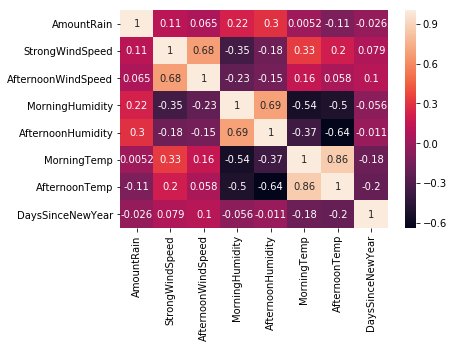

In [10]:
# The heatmap
sns.heatmap(X_train.corr(), annot=True)

# Select only numeric values

In [11]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

X_train[numericals] = std_scale.fit_transform(X_train[numericals])
X_cv[numericals] = std_scale.transform(X_cv[numericals])
test[numericals] = std_scale.transform(test[numericals])

C:\Users\ffonseca009\AppData\Local\Continuum\anaconda3\envs\ldsa\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ffonseca009\AppData\Local\Continuum\anaconda3\envs\ldsa\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\ffonseca009\AppData\Local\Continuum\anaconda3\envs\ldsa\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [12]:
# Select only the numeric inputs
#X_train = X_train.select_dtypes(include=[np.number])
#X_cv = X_cv.select_dtypes(include=[np.number])
#X_test = X_test.select_dtypes(include=[np.number])
#test = test.select_dtypes(include=[np.number])

In [13]:
# Remove the wind categories

#wind_categories = ['StrongWindDir', 'MorningWindDir', 'AfternoonWindDir']
#wind_categories = ['StrongWindDir', 'AfternoonWindDir']

"""
X_train = X_train.drop(wind_categories, axis=1)
X_cv = X_cv.drop(wind_categories, axis=1)
#X_test = X_test.drop(wind_categories, axis=1)
test = test.drop(wind_categories, axis=1)
"""

'\nX_train = X_train.drop(wind_categories, axis=1)\nX_cv = X_cv.drop(wind_categories, axis=1)\n#X_test = X_test.drop(wind_categories, axis=1)\ntest = test.drop(wind_categories, axis=1)\n'

In [14]:
X_train = pd.get_dummies(X_train)
X_cv = pd.get_dummies(X_cv)
#X_test = pd.get_dummies(X_test)
test = pd.get_dummies(test)

# Apply the Classifiers

In [15]:
# Create a dictionary which will hold the generalization erros.
generalization_results = pd.DataFrame(columns=['Score'])
predict_submissions = {}

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score

logit_clf = LogisticRegression(random_state=0)
logit_clf.fit(X_train,y_train)

generalization_results.loc['logit', 'Score'] = np.mean(cross_val_score(logit_clf, X_cv, y_cv, scoring='roc_auc', cv=KFold(n_splits=10, shuffle=True)))
predict_submissions['logit'] = logit_clf.predict_proba(test)[:, 1]

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold

forest = RandomForestClassifier()

forest_params = {'n_estimators': [10, 20, 50],
                'criterion': ['gini', 'entropy'],
                'max_features': ['auto', 'log2'],
                'max_depth': [1, 2, 3],
                'min_samples_split': [5, 10, 20],
                'min_samples_leaf': [2, 5, 10]}

rand = RandomizedSearchCV(estimator=forest,
                          param_distributions=forest_params,
                          n_iter=5,
                          scoring='accuracy',
                         cv = StratifiedKFold(n_splits=5, shuffle=True))

rand.fit(X_train, y_train)

rand_forest = rand.best_estimator_

generalization_results.loc['rand_forest', 'Score'] = np.mean(cross_val_score(rand_forest, X_cv, y_cv, scoring='roc_auc', cv=KFold(n_splits=10, shuffle=True)))
predict_submissions['rand_forest'] = rand.predict_proba(test)[:, 1]

### K-Neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier

neighbor = KNeighborsClassifier()

neighbor_params = {'n_neighbors': [1, 2, 4, 7, 10],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree']}


rand = RandomizedSearchCV(estimator=neighbor,
                          param_distributions=neighbor_params,
                          n_iter=5,
                          scoring='accuracy',
                         cv = StratifiedKFold(n_splits=5, shuffle=True))

rand.fit(X_train, y_train)

best_neighbor = rand.best_estimator_

generalization_results.loc['knearest', 'Score'] = np.mean(cross_val_score(best_neighbor, X_cv, y_cv, scoring='roc_auc', cv=KFold(n_splits=10, shuffle=True)))
predict_submissions['knearest'] = rand.predict_proba(test)[:, 1]

# Get the In Sample Score

In [19]:
# Show the Generalization Results.
generalization_results

,Score
logit,0.857175
rand_forest,0.816628
knearest,0.838234


In [20]:
# Define the best model has the one with the highest Score.
best_model = generalization_results[generalization_results.Score == np.max(generalization_results['Score'])].index[0]

In [21]:
final_submissions = predict_submissions[best_model]

# Predict the submission file

In [22]:
final_probas = pd.Series(logit_clf.predict_proba(test)[:, 1], index=submission_id)

In [23]:
def save_submission(probas, submission_id):
    _pd = pd.DataFrame(probas, index=submission_id)
    _pd.columns = ['TomorrowRainForecast']
    
    _pd.to_csv('output/submission.csv', index=True)


In [24]:
save_submission(final_submissions, submission_id)